In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("legal_queries.csv")
df.head(30)


,text,label
0,I want to cancel my subscription,cancellation
1,How do I get a refund?,refund
2,What are the terms and conditions?,policy
3,Cancel and get money back,cancellation
4,Can I receive a refund after cancellation?,refund
5,Give me the contract terms,policy
6,Im not happy cancel my plan,cancellation
7,Refund request for last months fee,refund
8,Explain the service agreement,policy
9,I want to cancel my subscription,cancellation


In [19]:
# split into Input (x) and Target (y)
x = df["text"]
y = df["label"]

In [20]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42    

)


In [21]:
x_train

8                  Explain the service agreement
16                     Cancel and get money back
3                      Cancel and get money back
13                             Refund my payment
15                         I need to cancel this
17               Refund request for late payment
2             What are the terms and conditions?
9               I want to cancel my subscription
18                    Give me the contract terms
4     Can I receive a refund after cancellation?
12                                Cancel my plan
7             Refund request for last months fee
10                        How do I get a refund?
14                                  Terms of use
6                    Im not happy cancel my plan
Name: text, dtype: object

In [22]:
y_train

8            policy
16     cancellation
3      cancellation
13           refund
15     cancellation
17           refund
2            policy
9      cancellation
18           policy
4            refund
12     cancellation
7            refund
10           refund
14           policy
6      cancellation
Name: label, dtype: object

In [23]:
# Vectorize The Text
vectorizer = TfidfVectorizer()   #it will convert text into numbers
#Fit son training data
x_train_vect = vectorizer.fit_transform(x_train)
# Transform test data using SAME object
x_test_vect = vectorizer.transform(x_test)

In [24]:
# Train The Classifier
model = MultinomialNB()
model.fit(x_train_vect,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [25]:
# Make Predictions
y_pred = model.predict(x_test_vect)

In [26]:
# Evaluate Perfomance
acc = accuracy_score(y_test,y_pred)
print(f"Accuracy: {acc:.2f}")

Accuracy: 1.00


In [27]:
print(x_train_vect.shape)  # e.g., (6, 29)
print(x_test_vect.shape)   # e.g., (3, 29) ✅ should match column count


(15, 42)
(4, 42)


In [28]:
print("Actual:", y_test.tolist())
print("Predicted:", y_pred.tolist())


Actual: ['cancellation', 'policy', 'policy', 'refund']
Predicted: ['cancellation', 'policy', 'policy', 'refund']


In [29]:
print(df["label"].value_counts())


label
cancellation     6
refund           6
policy           6
 cancellation    1
Name: count, dtype: int64


In [34]:
# Labels in the same order as used in training
labels = sorted(df["label"].unique())
print (labels)

[' cancellation', 'cancellation', 'policy', 'refund']


In [37]:
# Compute confusion matrix
cm = confusion_matrix(y_test,y_pred, labels=labels)
print(cm)

[[0 0 0 0]
 [0 1 0 0]
 [0 0 2 0]
 [0 0 0 1]]


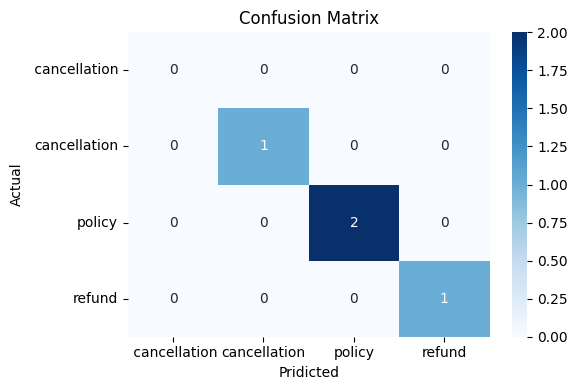

In [40]:
# Visulization of confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels,
            yticklabels=labels)
plt.xlabel("Pridicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()